In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np

In [121]:
df1 = pd.read_csv(r'../../data/tidy/energy-validation-april2022-31march.csv')

In [122]:
df1

,Unnamed: 0,timestamp,equipment_id,gallons,date,Powertrain
0,58909,3/31/2022 0:11,3310,33.10,3/31/2022,conventional
1,58910,3/31/2022 0:17,3303,6.40,3/31/2022,conventional
2,58911,3/31/2022 0:25,3320,12.40,3/31/2022,conventional
3,58912,3/31/2022 0:41,3402,34.80,3/31/2022,hybrid
4,58913,3/31/2022 0:49,3226,39.40,3/31/2022,conventional
...,...,...,...,...,...,...
3065,59563,4/30/2022 22:52,3228,20.90,4/30/2022,conventional
3066,24290,4/30/2022 22:53,1862,41.22,4/30/2022,conventional
3067,59564,4/30/2022 23:29,3314,23.50,4/30/2022,conventional
3068,59565,4/30/2022 23:43,3401,40.60,4/30/2022,hybrid


In [123]:
df1=df1.drop(columns='Unnamed: 0')

In [125]:
df1 = df1[(df1.Powertrain != 'electric')]

In [126]:
df1.sort_values(by=['equipment_id','timestamp'], ascending=True, inplace=True)

In [127]:
df1

,timestamp,equipment_id,gallons,date,Powertrain
84,3/31/2022 20:49,1552,80.30,3/31/2022,conventional
136,4/1/2022 15:34,1552,27.43,4/1/2022,conventional
1096,4/11/2022 19:10,1552,30.32,4/11/2022,conventional
1322,4/13/2022 19:03,1552,71.53,4/13/2022,conventional
1485,4/14/2022 22:32,1552,56.92,4/14/2022,conventional
...,...,...,...,...,...
2576,4/26/2022 20:14,7902,12.20,4/26/2022,hybrid
2656,4/27/2022 17:23,7902,23.80,4/27/2022,hybrid
2878,4/29/2022 6:56,7902,19.00,4/29/2022,hybrid
3000,4/30/2022 11:06,7902,26.10,4/30/2022,hybrid


In [128]:
df1['timestamp']= pd.to_datetime(df1['timestamp'])

In [129]:
df1.sort_values(by=['equipment_id','timestamp'], ascending=True, inplace=True)

In [130]:
df1

,timestamp,equipment_id,gallons,date,Powertrain
84,2022-03-31 20:49:00,1552,80.30,3/31/2022,conventional
136,2022-04-01 15:34:00,1552,27.43,4/1/2022,conventional
266,2022-04-02 18:30:00,1552,33.15,4/2/2022,conventional
512,2022-04-05 17:57:00,1552,52.29,4/5/2022,conventional
657,2022-04-06 19:49:00,1552,36.69,4/6/2022,conventional
...,...,...,...,...,...
2437,2022-04-25 18:43:00,7902,24.60,4/25/2022,hybrid
2576,2022-04-26 20:14:00,7902,12.20,4/26/2022,hybrid
2656,2022-04-27 17:23:00,7902,23.80,4/27/2022,hybrid
2878,2022-04-29 06:56:00,7902,19.00,4/29/2022,hybrid


In [131]:
df1['date'] = pd.to_datetime(df1['timestamp']).dt.date
df1['time'] = pd.to_datetime(df1['timestamp']).dt.time

In [132]:
df1

,timestamp,equipment_id,gallons,date,Powertrain,time
84,2022-03-31 20:49:00,1552,80.30,2022-03-31,conventional,20:49:00
136,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,15:34:00
266,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,18:30:00
512,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,17:57:00
657,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,19:49:00
...,...,...,...,...,...,...
2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,hybrid,18:43:00
2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,hybrid,20:14:00
2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,hybrid,17:23:00
2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,hybrid,06:56:00


In [133]:
vehicles=df1['equipment_id'].unique()

In [134]:
df1_modified = pd.DataFrame(columns=['timestamp', 'equipment_id', 'gallons', 'date', 'Powertrain', 'time'])
for v in vehicles:
    df1_vehicle = df1.loc[(df1["equipment_id"] == v)].copy()
    df1_vehicle.sort_values(by=['timestamp'], ascending=True, inplace=True)
    #df1_vehicle['time_delta_in_hour']=pd.to_timedelta(df1_vehicle['timestamp'].astype(str)).diff(-1).dt.total_seconds().div(3600)
    df1_vehicle['time_delta'] = (df1_vehicle['timestamp']-df1_vehicle['timestamp'].shift())
    #df1_modified = df1_modified.append(df1_vehicle, ignore_index = True)
    df1_modified=pd.concat([df1_modified, df1_vehicle])

In [154]:
df1_modified

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
0,2022-03-31 20:49:00,1552,80.30,2022-03-31,conventional,20:49:00,NaT,NaN
1,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,15:34:00,0 days 18:45:00,18.750000
2,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,18:30:00,1 days 02:56:00,26.933333
3,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,17:57:00,2 days 23:27:00,71.450000
4,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,19:49:00,1 days 01:52:00,25.866667
...,...,...,...,...,...,...,...,...
3016,2022-04-25 18:43:00,7902,24.60,2022-04-25,hybrid,18:43:00,0 days 11:35:00,11.583333
3017,2022-04-26 20:14:00,7902,12.20,2022-04-26,hybrid,20:14:00,1 days 01:31:00,25.516667
3018,2022-04-27 17:23:00,7902,23.80,2022-04-27,hybrid,17:23:00,0 days 21:09:00,21.150000
3019,2022-04-29 06:56:00,7902,19.00,2022-04-29,hybrid,06:56:00,1 days 13:33:00,37.550000


In [136]:
df1_modified['time_delta_in_hours'] = df1_modified['time_delta'].dt.total_seconds()/3600

In [137]:
df1_modified.head(20)

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
84,2022-03-31 20:49:00,1552,80.30,2022-03-31,conventional,20:49:00,NaT,NaN
136,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,15:34:00,0 days 18:45:00,18.750000
266,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,18:30:00,1 days 02:56:00,26.933333
512,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,17:57:00,2 days 23:27:00,71.450000
657,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,19:49:00,1 days 01:52:00,25.866667
749,2022-04-07 18:41:00,1552,45.61,2022-04-07,conventional,18:41:00,0 days 22:52:00,22.866667
1096,2022-04-11 19:10:00,1552,30.32,2022-04-11,conventional,19:10:00,4 days 00:29:00,96.483333
1322,2022-04-13 19:03:00,1552,71.53,2022-04-13,conventional,19:03:00,1 days 23:53:00,47.883333
1485,2022-04-14 22:32:00,1552,56.92,2022-04-14,conventional,22:32:00,1 days 03:29:00,27.483333
1867,2022-04-19 18:40:00,1552,22.60,2022-04-19,conventional,18:40:00,4 days 20:08:00,116.133333


<AxesSubplot: >

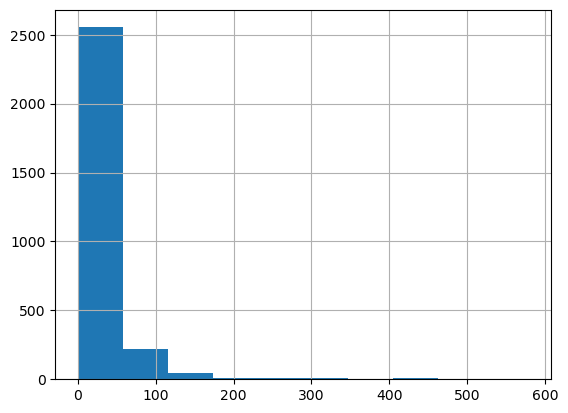

In [138]:
df1_modified['time_delta_in_hours'].dropna().hist()

In [139]:
df1_modified_dropped_nans = df1_modified.dropna()
df1_modified_dropped_zeros_and_nans= df1_modified_dropped_nans[df1_modified_dropped_nans['time_delta_in_hours'] != 0]

<AxesSubplot: >

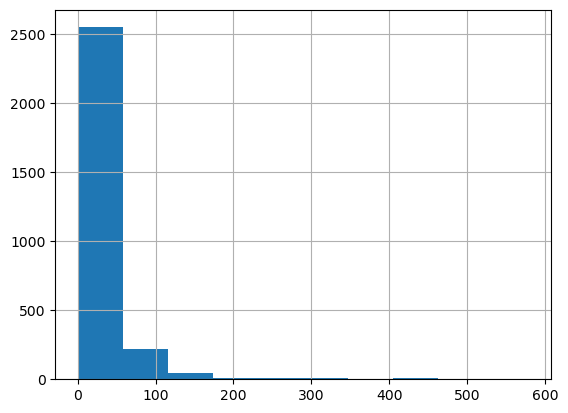

In [140]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].hist()

In [141]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].min()

0.016666666666666666

In [142]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].max()

579.0666666666667

In [143]:
df1_modified_dropped_zeros_and_nans[df1_modified_dropped_zeros_and_nans['time_delta_in_hours'] < 1]

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
2895,2022-04-29 16:05:00,1563,1.43,2022-04-29,conventional,16:05:00,0 days 00:48:00,0.800000
2006,2022-04-20 20:32:00,1701,2.91,2022-04-20,conventional,20:32:00,0 days 00:02:00,0.033333
411,2022-04-04 19:28:00,1722,27.48,2022-04-04,conventional,19:28:00,0 days 00:03:00,0.050000
809,2022-04-07 23:18:00,1722,42.38,2022-04-07,conventional,23:18:00,0 days 00:03:00,0.050000
1529,2022-04-15 16:03:00,1725,4.20,2022-04-15,conventional,16:03:00,0 days 00:35:00,0.583333
573,2022-04-05 22:19:00,1811,0.03,2022-04-05,conventional,22:19:00,0 days 00:02:00,0.033333
853,2022-04-08 17:48:00,1823,0.05,2022-04-08,conventional,17:48:00,0 days 00:01:00,0.016667
858,2022-04-08 18:22:00,1823,19.82,2022-04-08,conventional,18:22:00,0 days 00:34:00,0.566667
3008,2022-04-30 16:00:00,1859,5.12,2022-04-30,conventional,16:00:00,0 days 00:02:00,0.033333
693,2022-04-06 23:00:00,3305,0.30,2022-04-06,conventional,23:00:00,0 days 00:06:00,0.100000


In [145]:
df1_modified=df1_modified.reset_index()

In [147]:
df1_modified=df1_modified.drop(['index'], axis=1)

In [148]:
df1_modified.sort_values(by=['equipment_id','timestamp'], ascending=True, inplace=True)

In [149]:
df1_modified.head(20)

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
0,2022-03-31 20:49:00,1552,80.30,2022-03-31,conventional,20:49:00,NaT,NaN
1,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,15:34:00,0 days 18:45:00,18.750000
2,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,18:30:00,1 days 02:56:00,26.933333
3,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,17:57:00,2 days 23:27:00,71.450000
4,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,19:49:00,1 days 01:52:00,25.866667
5,2022-04-07 18:41:00,1552,45.61,2022-04-07,conventional,18:41:00,0 days 22:52:00,22.866667
6,2022-04-11 19:10:00,1552,30.32,2022-04-11,conventional,19:10:00,4 days 00:29:00,96.483333
7,2022-04-13 19:03:00,1552,71.53,2022-04-13,conventional,19:03:00,1 days 23:53:00,47.883333
8,2022-04-14 22:32:00,1552,56.92,2022-04-14,conventional,22:32:00,1 days 03:29:00,27.483333
9,2022-04-19 18:40:00,1552,22.60,2022-04-19,conventional,18:40:00,4 days 20:08:00,116.133333


In [150]:
df1_modified['time_delta'].max()

Timedelta('24 days 03:04:00')

In [151]:
df1_modified['time_delta'].min()

Timedelta('0 days 00:00:00')

In [106]:
df1_modified

,index,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
0,2659,2022-04-27 17:39:00,1320,0.68,2022-04-27,electric,17:39:00,NaT,NaN
1,2920,2022-04-29 18:56:00,1320,0.69,2022-04-29,electric,18:56:00,2 days 01:17:00,49.283333
2,1760,2022-04-18 18:24:00,1321,1.83,2022-04-18,electric,18:24:00,NaT,NaN
3,1857,2022-04-19 17:56:00,1321,0.58,2022-04-19,electric,17:56:00,0 days 23:32:00,23.533333
4,2915,2022-04-29 18:47:00,1321,0.66,2022-04-29,electric,18:47:00,10 days 00:51:00,240.850000
...,...,...,...,...,...,...,...,...,...
3065,2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,hybrid,18:43:00,0 days 11:35:00,11.583333
3066,2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,hybrid,20:14:00,1 days 01:31:00,25.516667
3067,2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,hybrid,17:23:00,0 days 21:09:00,21.150000
3068,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,hybrid,06:56:00,1 days 13:33:00,37.550000


In [152]:
outliers_index=df1_modified.index[df1_modified['time_delta_in_hours'] < 1]

In [156]:
outliers_index

Int64Index([  80,  692,  913,  916,  984, 1214, 1402, 1403, 1938, 2191, 2192,
            2193, 2216, 2679, 2694, 2695, 2760, 2761, 2914, 2990],
           dtype='int64')

In [157]:
df1_modified

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
0,2022-03-31 20:49:00,1552,80.30,2022-03-31,conventional,20:49:00,NaT,NaN
1,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,15:34:00,0 days 18:45:00,18.750000
2,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,18:30:00,1 days 02:56:00,26.933333
3,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,17:57:00,2 days 23:27:00,71.450000
4,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,19:49:00,1 days 01:52:00,25.866667
...,...,...,...,...,...,...,...,...
3016,2022-04-25 18:43:00,7902,24.60,2022-04-25,hybrid,18:43:00,0 days 11:35:00,11.583333
3017,2022-04-26 20:14:00,7902,12.20,2022-04-26,hybrid,20:14:00,1 days 01:31:00,25.516667
3018,2022-04-27 17:23:00,7902,23.80,2022-04-27,hybrid,17:23:00,0 days 21:09:00,21.150000
3019,2022-04-29 06:56:00,7902,19.00,2022-04-29,hybrid,06:56:00,1 days 13:33:00,37.550000


In [158]:
for i in outliers_index:
    df1_modified.loc[i,'gallons']=df1_modified.loc[i-1,'gallons']+df1_modified.loc[i,'gallons']
    df1_modified.loc[i,'time_delta_in_hours']=df1_modified.loc[i-1,'time_delta_in_hours']+df1_modified.loc[i,'time_delta_in_hours']
    df1_modified.loc[i,'time_delta']=df1_modified.loc[i-1,'time_delta']+df1_modified.loc[i,'time_delta']

In [162]:
df1_modified[df1_modified['time_delta_in_hours'] < 1]

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours


In [163]:
df1_modified.to_csv(r'../../data/tidy/energy-validation-april2022-31march-without-outliers.csv')

In [164]:
# We had 19 data points with fueling interval less than one hour, all of these rows should be aggregated with privious ones
# I removed them above and saved them in "energy-validation-april2022-31march-without-outliers"
# I also removed fueling tickets for electric buses

In [165]:
df1 = pd.read_csv(r'../../data/tidy/energy-validation-april2022-31march-without-outliers.csv')

In [166]:
df1=df1.drop(columns='Unnamed: 0')

In [167]:
df1['timestamp']= pd.to_datetime(df1['timestamp'])

In [168]:
df1.sort_values(by=['equipment_id','timestamp'], ascending=True, inplace=True)

In [169]:
df1['date'] = pd.to_datetime(df1['timestamp']).dt.date
df1['time'] = pd.to_datetime(df1['timestamp']).dt.time

In [170]:
vehicles=df1['equipment_id'].unique()

In [171]:
df1_modified = pd.DataFrame(columns=['timestamp', 'equipment_id', 'gallons', 'date', 'Powertrain', 'time'])
for v in vehicles:
    df1_vehicle = df1.loc[(df1["equipment_id"] == v)].copy()
    df1_vehicle.sort_values(by=['timestamp'], ascending=True, inplace=True)
    #df1_vehicle['time_delta_in_hour']=pd.to_timedelta(df1_vehicle['timestamp'].astype(str)).diff(-1).dt.total_seconds().div(3600)
    df1_vehicle['time_delta'] = (df1_vehicle['timestamp']-df1_vehicle['timestamp'].shift())
    #df1_modified = df1_modified.append(df1_vehicle, ignore_index = True)
    df1_modified=pd.concat([df1_modified, df1_vehicle])

In [172]:
df1_modified['time_delta_in_hours'] = df1_modified['time_delta'].dt.total_seconds()/3600

<AxesSubplot: >

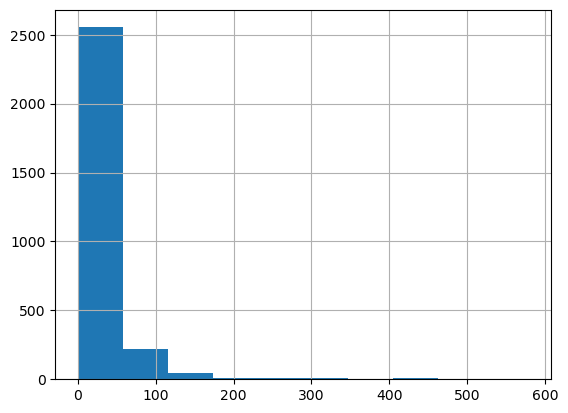

In [173]:
df1_modified['time_delta_in_hours'].dropna().hist()

In [174]:
df1_modified_dropped_nans = df1_modified.dropna()
df1_modified_dropped_zeros_and_nans= df1_modified_dropped_nans[df1_modified_dropped_nans['time_delta_in_hours'] != 0]

<AxesSubplot: >

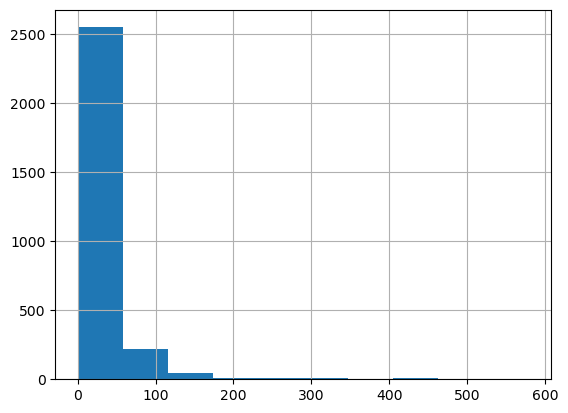

In [175]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].hist()

In [176]:
df1_modified_dropped_zeros_and_nans[df1_modified_dropped_zeros_and_nans['time_delta_in_hours'] > 200]

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
51,2022-04-26 17:35:00,1557,17.33,2022-04-26,conventional,17:35:00,13 days 01:52:00,313.866667
281,2022-04-23 18:17:00,1577,44.34,2022-04-23,conventional,18:17:00,10 days 02:11:00,242.183333
291,2022-04-21 21:37:00,1578,1.19,2022-04-21,conventional,21:37:00,19 days 04:56:00,460.933333
600,2022-04-29 15:32:00,1662,39.29,2022-04-29,conventional,15:32:00,17 days 00:02:00,408.033333
791,2022-04-15 22:53:00,1715,13.47,2022-04-15,conventional,22:53:00,9 days 06:52:00,222.866667
920,2022-04-25 16:02:00,1722,14.92,2022-04-25,conventional,16:02:00,13 days 16:49:00,328.816667
1171,2022-04-29 16:27:00,1803,19.26,2022-04-29,hybrid,16:27:00,10 days 20:52:00,260.866667
1238,2022-04-15 22:08:00,1812,56.82,2022-04-15,conventional,22:08:00,11 days 00:18:00,264.300000
1368,2022-04-15 13:08:00,1821,29.26,2022-04-15,conventional,13:08:00,12 days 15:48:00,303.800000
1384,2022-04-15 22:21:00,1822,49.30,2022-04-15,conventional,22:21:00,9 days 06:11:00,222.183333


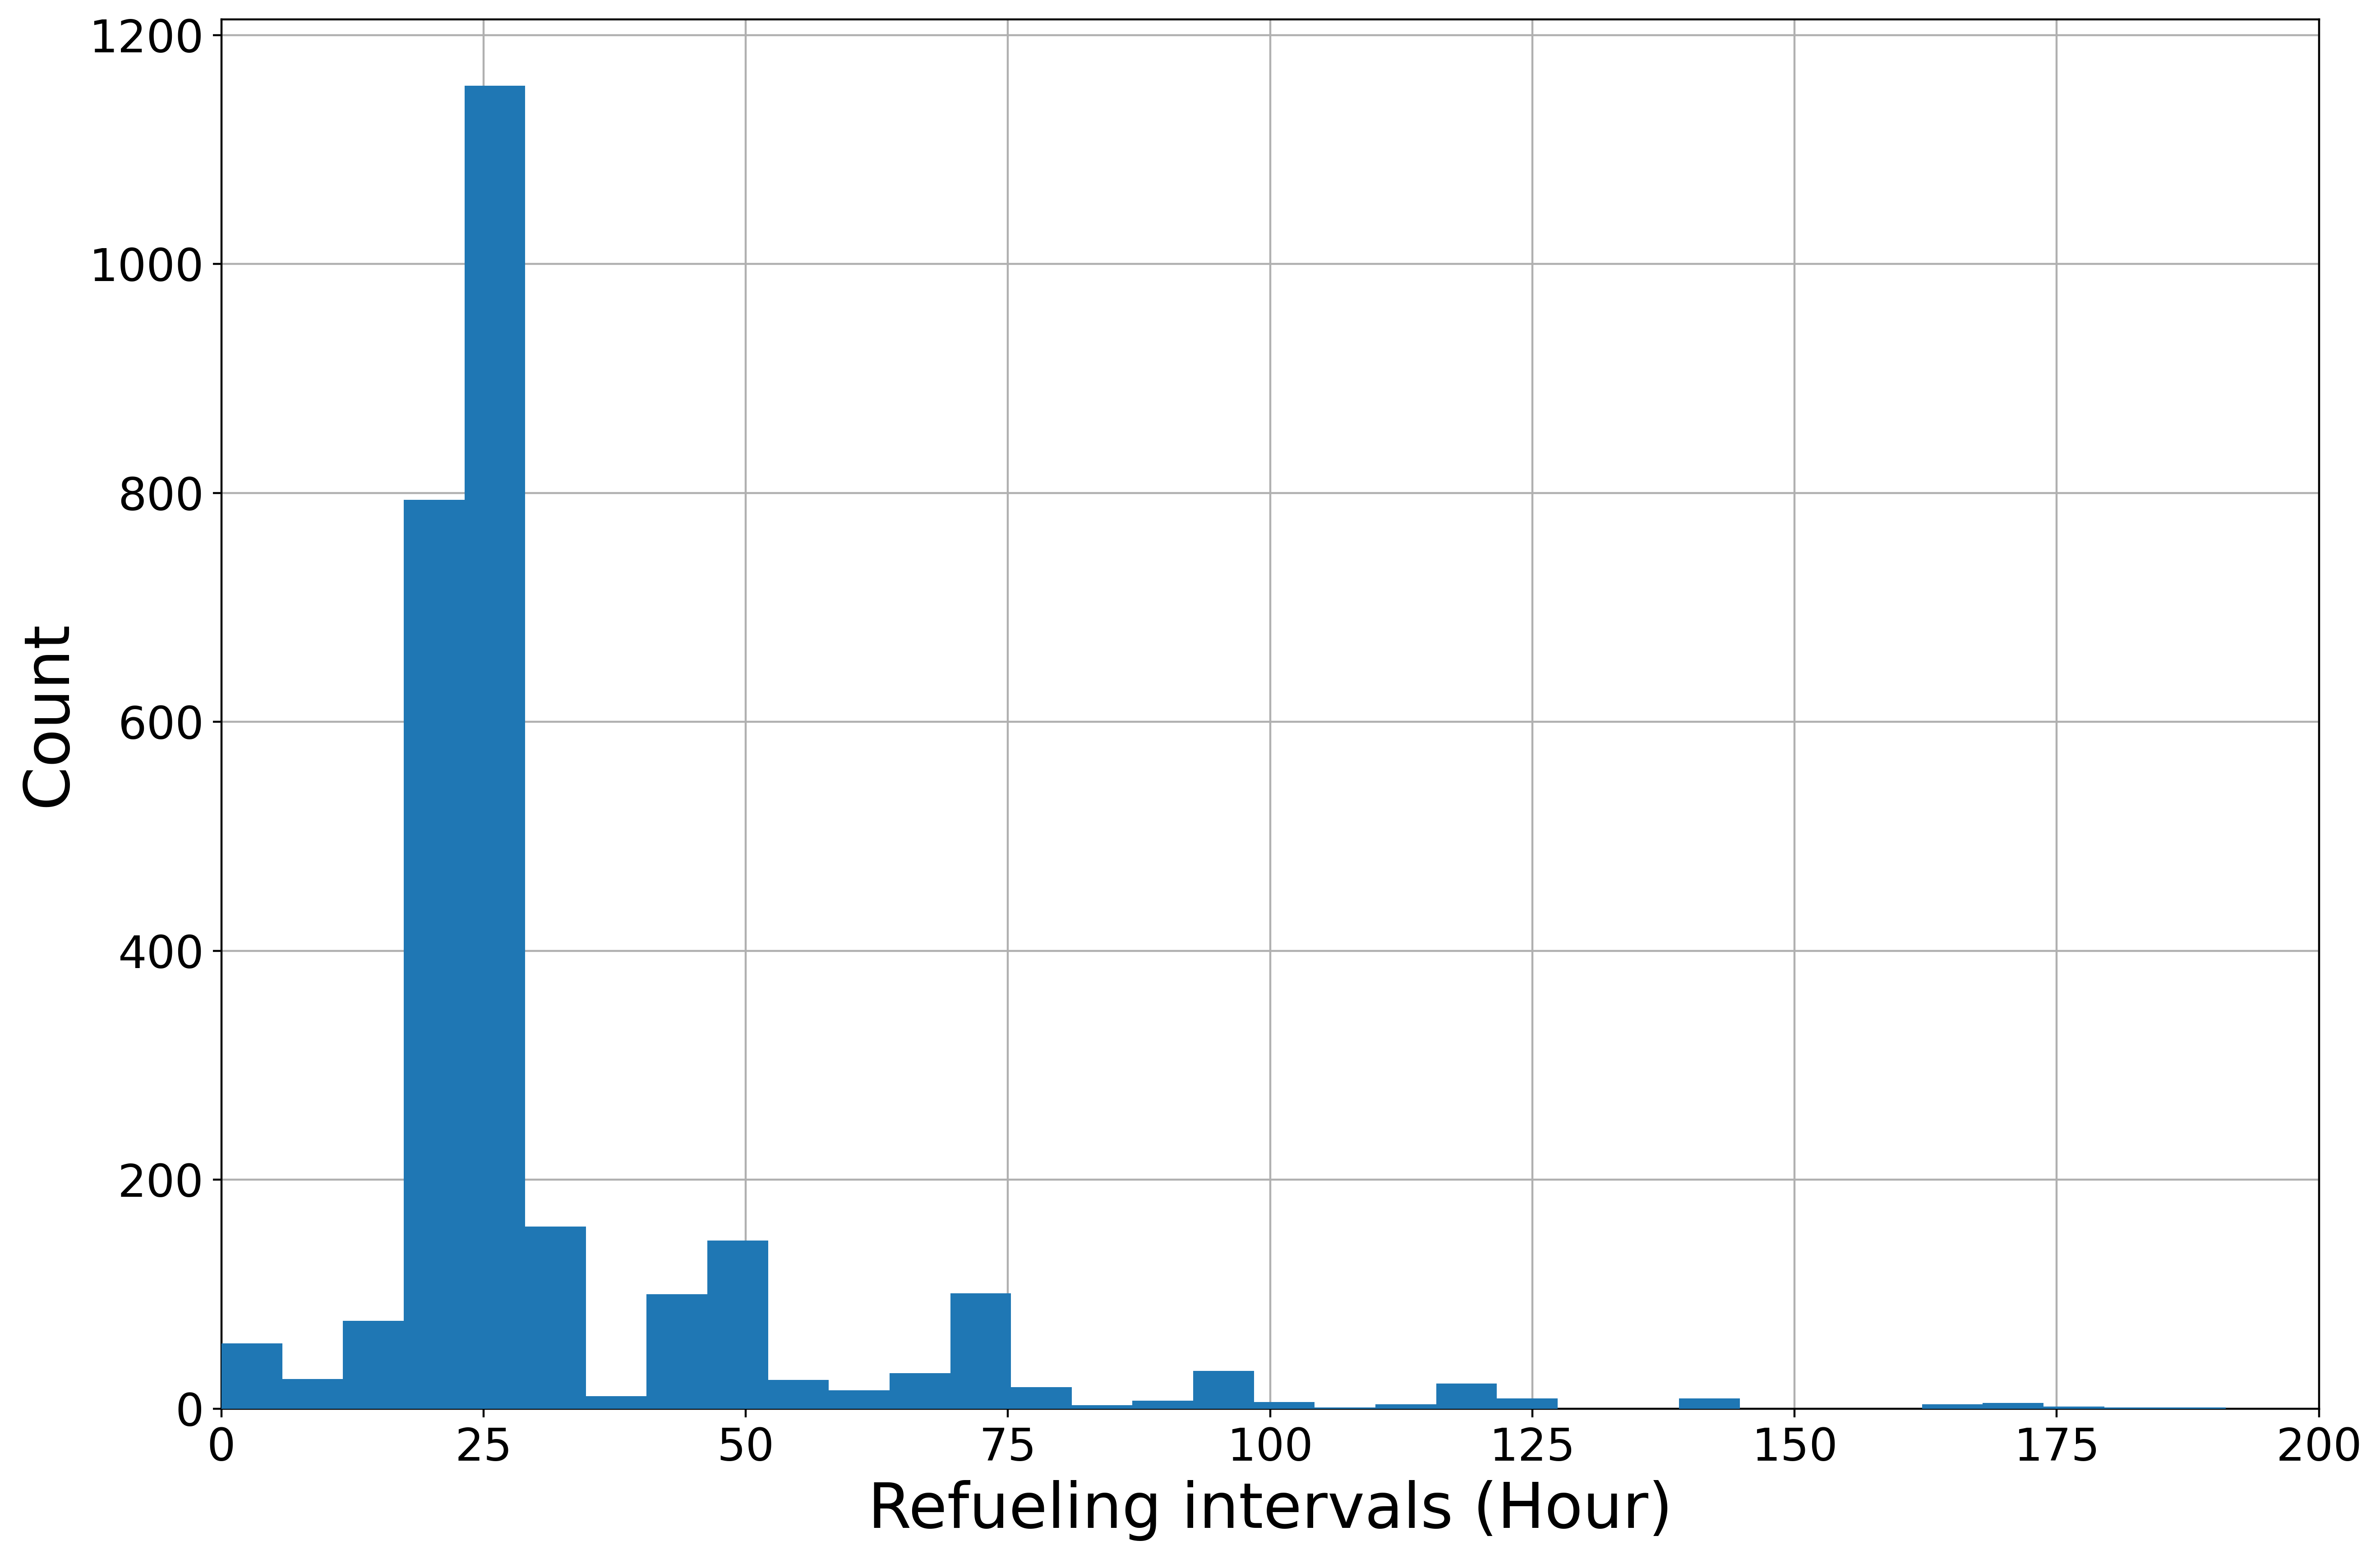

In [177]:
figure(figsize=(15 , 10), dpi=400)
ax=df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].hist(bins=100, zorder=3)
ax.set_xlabel('Refueling intervals (Hour)', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0,200)
plt.savefig(r'../../figures/hist-fueling-intervals.png', dpi=400, bbox_inches='tight')

In [178]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].mean()

34.83083479276124

In [179]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].min()

0.016666666666666666

In [180]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].max()

579.0666666666667

In [181]:
df1_modified_dropped_zeros_and_nans['time_delta_in_hours'].median()

24.766666666666666

In [182]:
df1_modified_dropped_zeros_and_nans[(df1_modified_dropped_zeros_and_nans['date'] < datetime.date(2022,4,23))]

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
1,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,15:34:00,0 days 18:45:00,18.750000
2,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,18:30:00,1 days 02:56:00,26.933333
3,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,17:57:00,2 days 23:27:00,71.450000
4,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,19:49:00,1 days 01:52:00,25.866667
5,2022-04-07 18:41:00,1552,45.61,2022-04-07,conventional,18:41:00,0 days 22:52:00,22.866667
...,...,...,...,...,...,...,...,...
3009,2022-04-13 17:21:00,7902,27.20,2022-04-13,hybrid,17:21:00,0 days 11:42:00,11.700000
3010,2022-04-18 11:58:00,7902,34.00,2022-04-18,hybrid,11:58:00,4 days 18:37:00,114.616667
3011,2022-04-19 20:20:00,7902,14.40,2022-04-19,hybrid,20:20:00,1 days 08:22:00,32.366667
3012,2022-04-21 05:43:00,7902,25.00,2022-04-21,hybrid,05:43:00,1 days 09:23:00,33.383333


In [183]:
df1_modified_dropped_zeros_and_nans[(df1_modified_dropped_zeros_and_nans['date'] > datetime.date(2022,4,23))]

,timestamp,equipment_id,gallons,date,Powertrain,time,time_delta,time_delta_in_hours
14,2022-04-25 19:06:00,1552,33.95,2022-04-25,conventional,19:06:00,2 days 02:46:00,50.766667
15,2022-04-27 16:01:00,1552,3.52,2022-04-27,conventional,16:01:00,1 days 20:55:00,44.916667
16,2022-04-30 21:45:00,1552,56.89,2022-04-30,conventional,21:45:00,3 days 05:44:00,77.733333
51,2022-04-26 17:35:00,1557,17.33,2022-04-26,conventional,17:35:00,13 days 01:52:00,313.866667
52,2022-04-29 19:06:00,1557,12.70,2022-04-29,conventional,19:06:00,3 days 01:31:00,73.516667
...,...,...,...,...,...,...,...,...
3016,2022-04-25 18:43:00,7902,24.60,2022-04-25,hybrid,18:43:00,0 days 11:35:00,11.583333
3017,2022-04-26 20:14:00,7902,12.20,2022-04-26,hybrid,20:14:00,1 days 01:31:00,25.516667
3018,2022-04-27 17:23:00,7902,23.80,2022-04-27,hybrid,17:23:00,0 days 21:09:00,21.150000
3019,2022-04-29 06:56:00,7902,19.00,2022-04-29,hybrid,06:56:00,1 days 13:33:00,37.550000
